## Import needed packages

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading dataset

In [118]:
df = pd.read_csv('../data/uber.csv')
df.head(10)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


**The dataset contains the following fields:**

- <i>key</i> : a unique identifier for each trip

- <i>fare_amount</i> : the cost of each trip in usd

- <i>pickup_datetime</i> : date and time when the meter was engaged

- <i>passenger_count</i> : the number of passengers in the vehicle (driver entered value)

- <i>pickup_longitude</i> : the longitude where the meter was engaged

- <i>pickup_latitude</i> : the latitude where the meter was engaged

- <i>dropoff_longitude</i> : the longitude where the meter was disengaged

- <i>dropoff_latitude</i> : the latitude where the meter was disengaged

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [120]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [122]:
df.loc[:,'pickup_longitude':'dropoff_latitude'] = df.loc[:,'pickup_longitude':'dropoff_latitude'].replace(to_replace=0,value=np.nan)
df = df.dropna()

In [123]:
df = df.drop_duplicates()

In [124]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


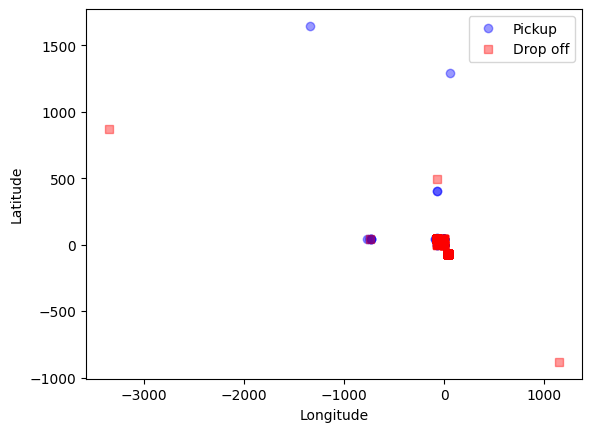

In [125]:
plt.figure()

plt.plot(df['pickup_longitude'],df['pickup_latitude'],'bo',label ='Pickup',alpha=0.4)
plt.plot(df['dropoff_longitude'],df['dropoff_latitude'],'rs',label='Drop off',alpha=0.4)

plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [126]:
from sklearn.metrics.pairwise import haversine_distances

pickup_rad = np.radians(df[['pickup_latitude', 'pickup_longitude']])
dropoff_rad = np.radians(df[['dropoff_latitude', 'dropoff_longitude']])

distance = np.zeros(df.shape[0])

for i in np.arange(df.shape[0]):

    distance[i] = haversine_distances([pickup_rad.iloc[i,:].to_numpy() , dropoff_rad.iloc[i,:].to_numpy()])[0,1]

distance_in_km = distance * 6371

In [127]:
df['distance_in_km'] = distance_in_km
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.889417
10,2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2.250858


In [128]:
df['manh_dist'] = np.abs(df['pickup_longitude'] - df['dropoff_longitude']) +\
      np.abs(df['pickup_latitude'] - df['dropoff_latitude'])

In [129]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,manh_dist
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228,4.773455,0.118236
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150,94.109955,10.650143
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000,1.255519,0.016405
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,2.156634,0.028153
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000,3.910220,0.050822
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,3270.155787


<Figure size 640x480 with 0 Axes>

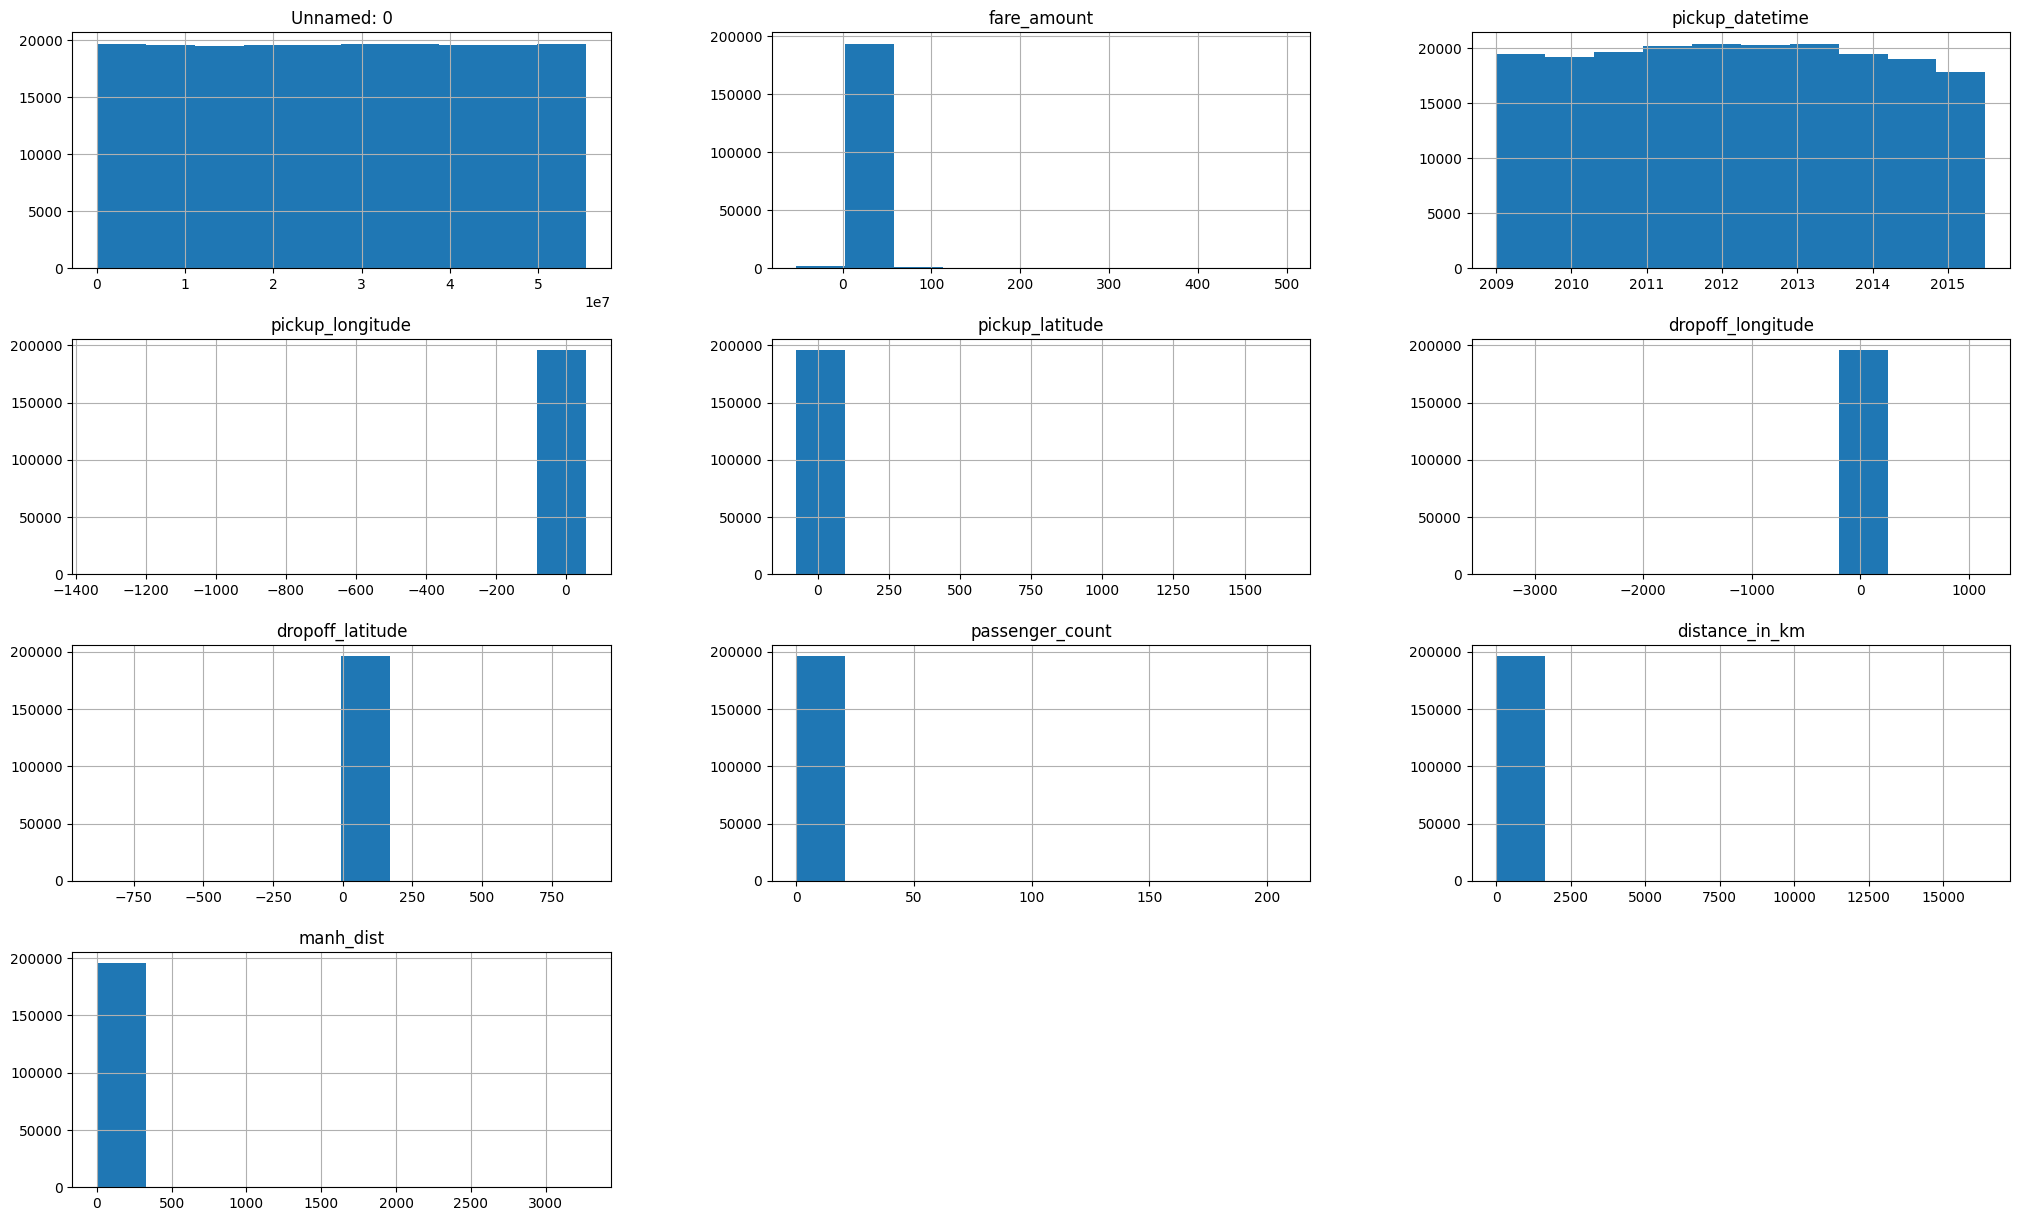

In [130]:
plt.figure()
df.hist(figsize=(25, 15));

In [131]:
df = df[(df['distance_in_km'] <= 20) & (df['distance_in_km'] >= 0.05)]
df = df[(df['fare_amount'] >= 1) & (df['fare_amount'] <= 60)]
df = df[df['passenger_count'] <= 6]

df = df[['fare_amount', 'distance_in_km', 'manh_dist', 'pickup_datetime', 'passenger_count']]

In [132]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hr'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute

In [133]:
df['pickup_time'] = (df['pickup_hr']*60 + df['pickup_min']) / 60

In [134]:
df['pickup_time_frac'] = (df['pickup_hr']) / 23

In [135]:
df.describe()

,fare_amount,distance_in_km,manh_dist,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hr,pickup_min,pickup_time,pickup_time_frac
count,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000,190294.000000
mean,10.681938,3.121041,0.041005,1.683821,2011.741521,6.278522,15.705062,13.494992,29.529581,13.987152,0.586739
std,7.695178,2.932686,0.039856,1.307783,1.859174,3.441924,8.685894,6.524075,17.337138,6.530893,0.283655
min,2.500000,0.050318,0.000533,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.280082,0.016717,1.000000,2010.000000,3.000000,8.000000,9.000000,14.000000,9.400000,0.391304
50%,8.500000,2.159383,0.028185,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,14.633333,0.608696
75%,12.500000,3.834670,0.049762,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,19.533333,0.826087
max,60.000000,19.998309,0.307202,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,23.983333,1.000000


<Figure size 640x480 with 0 Axes>

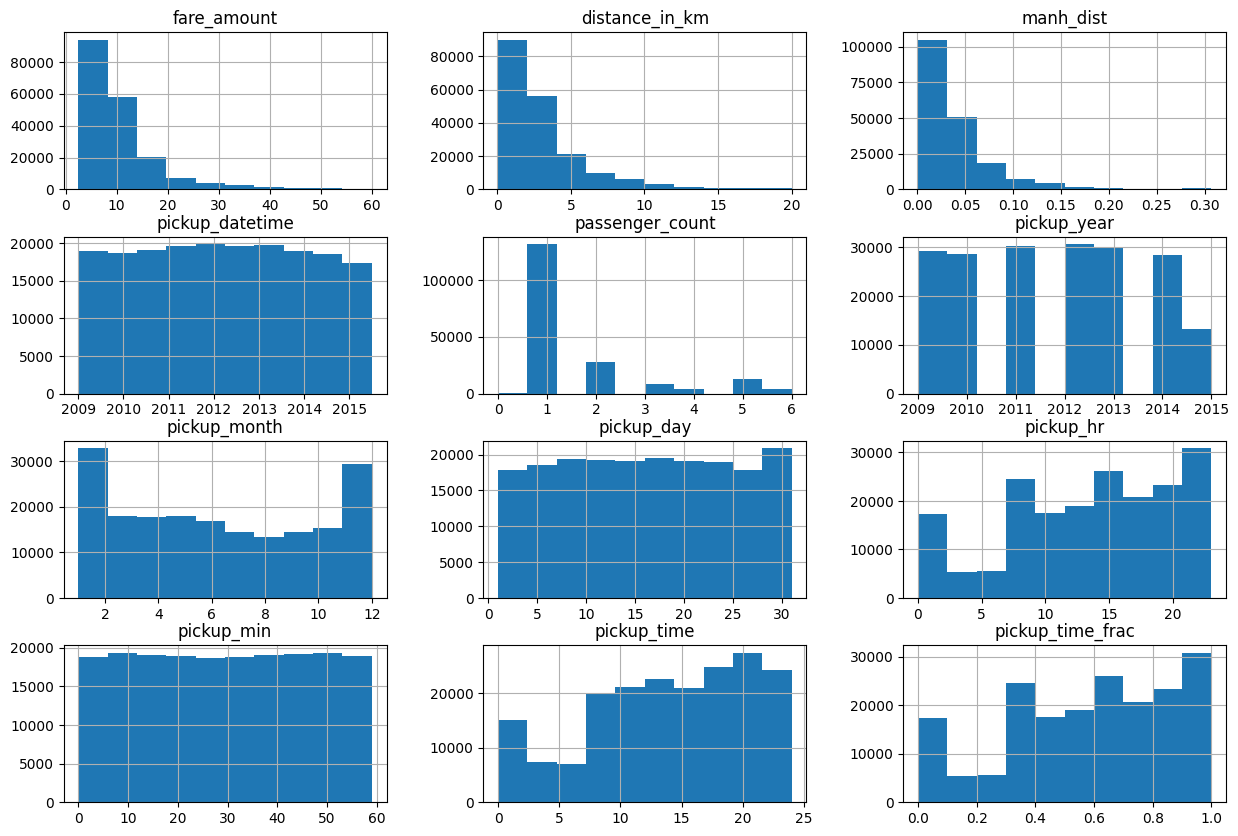

In [136]:
plt.figure()
df.hist(figsize=(15, 10));

In [137]:
df['log_fare_amount'] = np.log(df['fare_amount'])
df['log_distance_in_km'] = np.log(df['distance_in_km'])
df['log_manh_dist'] = np.log(df['manh_dist'])


<Figure size 640x480 with 0 Axes>

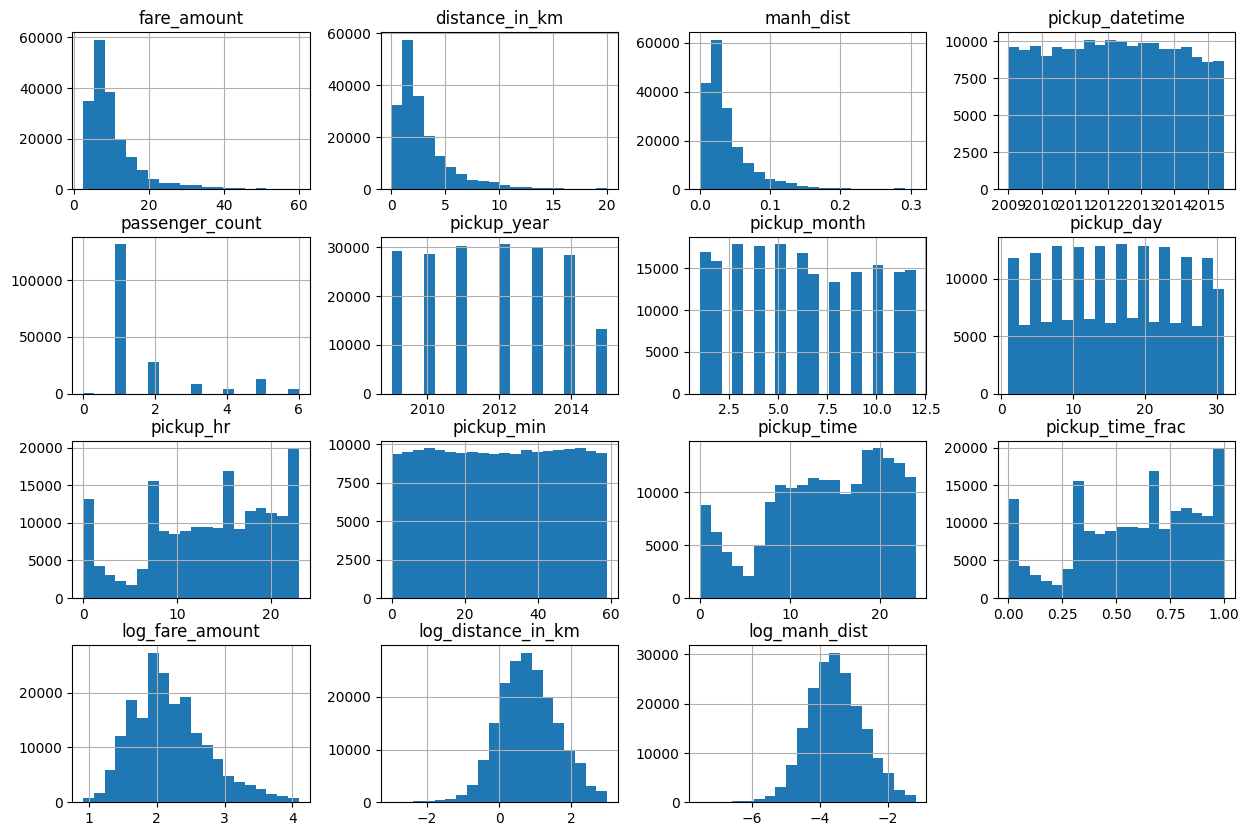

In [138]:
plt.figure()

df.hist(figsize=(15, 10), bins=20);

In [139]:
df = df.drop(['fare_amount', 'distance_in_km', 'manh_dist', 'pickup_year', 'pickup_month', 'pickup_hr', 'pickup_min'], axis=1)
df

,pickup_datetime,passenger_count,pickup_day,pickup_time,pickup_time_frac,log_fare_amount,log_distance_in_km,log_manh_dist
0,2015-05-07 19:52:06+00:00,1,7,19.866667,0.826087,2.014903,0.520770,-4.170671
1,2009-07-17 20:04:56+00:00,1,17,20.066667,0.869565,2.041220,0.899181,-3.796242
2,2009-08-24 21:45:00+00:00,1,24,21.750000,0.913043,2.557227,1.616687,-2.598904
3,2009-06-26 08:22:21+00:00,3,26,8.366667,0.347826,1.667707,0.507831,-3.758744
4,2014-08-28 17:47:00+00:00,5,28,17.783333,0.739130,2.772589,1.498607,-2.729974
...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00+00:00,1,28,10.816667,0.434783,1.098612,-2.187381,-6.538263
199996,2014-03-14 01:09:00+00:00,1,14,1.150000,0.043478,2.014903,0.628635,-3.699617
199997,2009-06-29 00:42:00+00:00,2,29,0.700000,0.000000,3.430756,2.553369,-1.655697
199998,2015-05-20 14:56:25+00:00,1,20,14.933333,0.608696,2.674149,1.264046,-3.124809


In [140]:
df['day_of_week'] = df['pickup_datetime'].dt.day_of_week # Monday, ...


In [141]:
df['n_week'] = (df['pickup_day'] - 1) // 7 + 1 # Weeks in month

In [142]:
df = df.reset_index(drop=True)
df

,pickup_datetime,passenger_count,pickup_day,pickup_time,pickup_time_frac,log_fare_amount,log_distance_in_km,log_manh_dist,day_of_week,n_week
0,2015-05-07 19:52:06+00:00,1,7,19.866667,0.826087,2.014903,0.520770,-4.170671,3,1
1,2009-07-17 20:04:56+00:00,1,17,20.066667,0.869565,2.041220,0.899181,-3.796242,4,3
2,2009-08-24 21:45:00+00:00,1,24,21.750000,0.913043,2.557227,1.616687,-2.598904,0,4
3,2009-06-26 08:22:21+00:00,3,26,8.366667,0.347826,1.667707,0.507831,-3.758744,4,4
4,2014-08-28 17:47:00+00:00,5,28,17.783333,0.739130,2.772589,1.498607,-2.729974,3,4
...,...,...,...,...,...,...,...,...,...,...
190289,2012-10-28 10:49:00+00:00,1,28,10.816667,0.434783,1.098612,-2.187381,-6.538263,6,4
190290,2014-03-14 01:09:00+00:00,1,14,1.150000,0.043478,2.014903,0.628635,-3.699617,4,2
190291,2009-06-29 00:42:00+00:00,2,29,0.700000,0.000000,3.430756,2.553369,-1.655697,0,5
190292,2015-05-20 14:56:25+00:00,1,20,14.933333,0.608696,2.674149,1.264046,-3.124809,2,3


In [143]:
df = df.drop(['pickup_datetime', 'pickup_day'], axis=1)

In [144]:
# df['is_weekend'] = df['pickup_datetime'].dt.day_of_week > 4
# df = df.drop(['pickup_datetime'], axis = 1)
# df = df.reset_index(drop=True)

In [145]:
# df['is_weekend'] = df['is_weekend'].astype('int')

<Axes: >

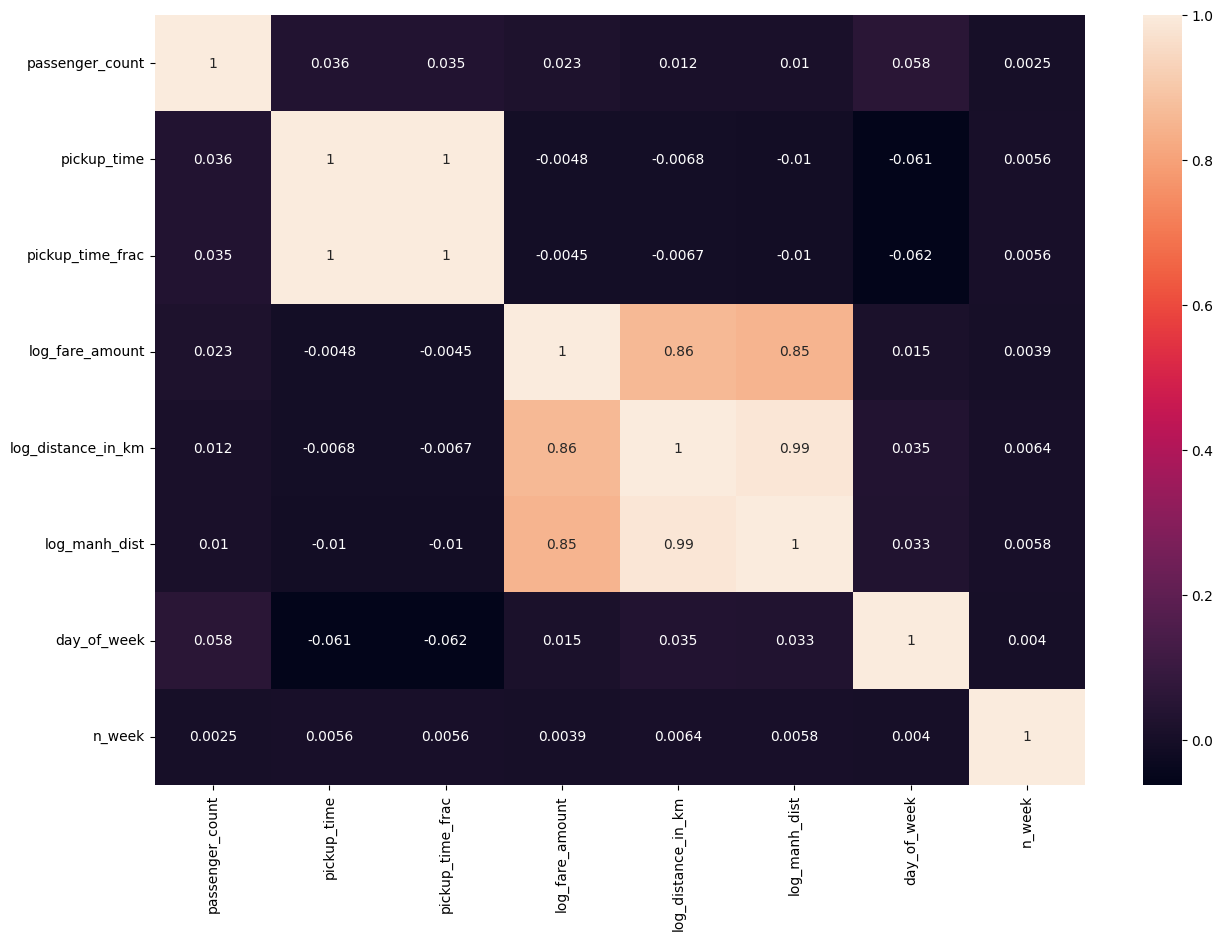

In [146]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(method='spearman'), annot=True)

In [147]:
df = df.drop(['log_manh_dist', 'pickup_time_frac'], axis=1)

In [148]:
df

,passenger_count,pickup_time,log_fare_amount,log_distance_in_km,day_of_week,n_week
0,1,19.866667,2.014903,0.520770,3,1
1,1,20.066667,2.041220,0.899181,4,3
2,1,21.750000,2.557227,1.616687,0,4
3,3,8.366667,1.667707,0.507831,4,4
4,5,17.783333,2.772589,1.498607,3,4
...,...,...,...,...,...,...
190289,1,10.816667,1.098612,-2.187381,6,4
190290,1,1.150000,2.014903,0.628635,4,2
190291,2,0.700000,3.430756,2.553369,0,5
190292,1,14.933333,2.674149,1.264046,2,3


In [149]:
df = df.drop(['passenger_count'], axis=1)
# for trying

# Preprocessing

In [150]:
X = df.drop('log_fare_amount', axis=1)
y = df['log_fare_amount']

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, shuffle=True, random_state=42, stratify=df[['day_of_week', 'n_week']]
)

In [152]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [153]:
from sklearn.preprocessing import OneHotEncoder

train_one_hot = OneHotEncoder(sparse_output=False)
train_enc = train_one_hot.fit_transform(X_train[['day_of_week', 'n_week']])
train_enc.shape


(180779, 12)

In [154]:
df

,pickup_time,log_fare_amount,log_distance_in_km,day_of_week,n_week
0,19.866667,2.014903,0.520770,3,1
1,20.066667,2.041220,0.899181,4,3
2,21.750000,2.557227,1.616687,0,4
3,8.366667,1.667707,0.507831,4,4
4,17.783333,2.772589,1.498607,3,4
...,...,...,...,...,...
190289,10.816667,1.098612,-2.187381,6,4
190290,1.150000,2.014903,0.628635,4,2
190291,0.700000,3.430756,2.553369,0,5
190292,14.933333,2.674149,1.264046,2,3


In [155]:
X_train = X_train.drop(['day_of_week', 'n_week'], axis=1)


In [156]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

normal_scalar = MinMaxScaler()
X_train = normal_scalar.fit_transform(X_train)


In [157]:
X_train = np.hstack([X_train, train_enc])

In [158]:
test_enc = train_one_hot.transform(X_test[['day_of_week','n_week']])
X_test = X_test.drop(['day_of_week', 'n_week'], axis=1)
X_test = normal_scalar.transform(X_test)
X_test = np.hstack([X_test, test_enc])

In [159]:
# train_one_hot = pd.DataFrame(result, columns=one_hot_enc.get_feature_names_out(X_train[['day_of_week', 'n_week']].columns))
# pd.concat([X_train.drop(['day_of_week', 'n_week'], axis=1), train_one_hot], axis=1)

In [160]:
# X_train_n = pd.DataFrame(X_train_n, columns=X_train.drop(['is_weekend'], axis=1).columns)
# X_train_n = pd.concat([X_train_n, X_train['is_weekend']], axis=1)
# X_train = X_train_n

In [161]:
# X_test_n = normal_scalar.transform(X_test.drop(['is_weekend'], axis=1))
# X_test_n = pd.DataFrame(X_test_n, columns=X_test.drop(['is_weekend'], axis=1).columns)
# X_test_n = pd.concat([X_test_n, X_test['is_weekend']], axis=1)
# X_test = X_test_n

# Modeling

### Decision Tree

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
params = {'max_depth': [3, 5, 7, 10],
          'min_samples_split': [2, 5, 7, 9, 11],
          'min_samples_leaf': [10, 15, 20, 25]}

grid = GridSearchCV(estimator=dt, param_grid=params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [2, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [163]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [164]:
grid.best_score_

-0.06777517891518607

In [165]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=25, random_state=42)

In [166]:
best_dt = grid.best_estimator_

In [167]:
best_dt.feature_importances_

array([9.93901469e-03, 9.89551058e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.01338998e-04, 0.00000000e+00, 8.58792281e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [168]:
yhat_train = best_dt.predict(X_train)

In [169]:
from sklearn.metrics import mean_squared_error,r2_score

mse_train = mean_squared_error(np.exp(y_train),np.exp(yhat_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(np.exp(y_train),np.exp(yhat_train))
print(f'{mse_train = }, {rmse_train = }, {r2_train = }')

mse_train = 12.414932200158386, rmse_train = 3.5234829643633, r2_train = 0.7908448688528512


In [170]:
yhat_test = best_dt.predict(X_test)

In [171]:
mse_test = mean_squared_error(np.exp(y_test),np.exp(yhat_test))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test),np.exp(yhat_test))
print(f'{mse_test = }, {rmse_test = }, {r2_test = }')

mse_test = 12.120752846538648, rmse_test = 3.481487160185809, r2_test = 0.7855341517962786


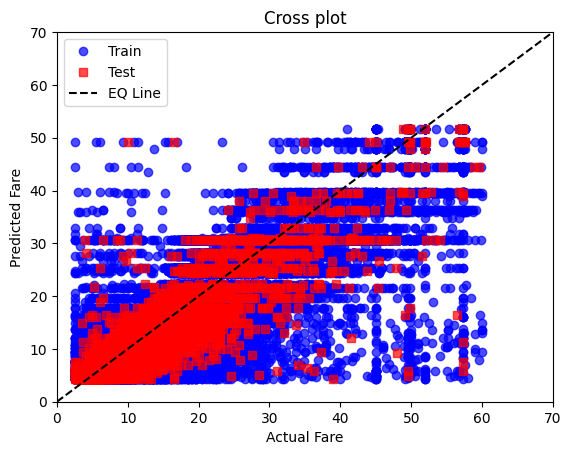

In [172]:
plt.figure()
plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.7,label='Train')
plt.plot(np.exp(y_test), np.exp(yhat_test), 'rs', alpha=0.7,label='Test')
plt.plot([0,100],[0,100],'k--',label='EQ Line')
plt.xlim((0, 70))
plt.ylim((0, 70))
plt.legend();
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Cross plot');

### Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [174]:
yhat_train = lr.predict(X_train)

In [175]:
from sklearn.metrics import mean_squared_error,r2_score

mse_train = mean_squared_error(np.exp(y_train),np.exp(yhat_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(np.exp(y_train),np.exp(yhat_train))
print(f'{mse_train = }, {rmse_train = }, {r2_train = }')

mse_train = 18.53358094419889, rmse_train = 4.305064569109143, r2_train = 0.6877636147734449


In [176]:
yhat_test = lr.predict(X_test)

In [177]:
mse_test = mean_squared_error(np.exp(y_test),np.exp(yhat_test))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test),np.exp(yhat_test))
print(f'{mse_test = }, {rmse_test = }, {r2_test = }')

mse_test = 17.369467424566473, rmse_test = 4.1676693036476005, r2_test = 0.6926628559115982


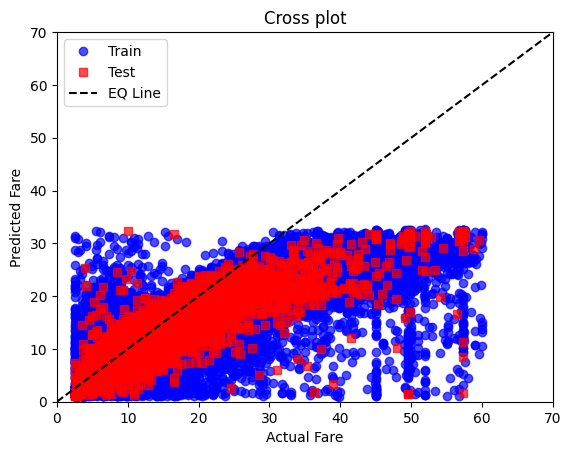

In [178]:
plt.figure()
plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.7,label='Train')
plt.plot(np.exp(y_test), np.exp(yhat_test), 'rs', alpha=0.7,label='Test')
plt.plot([0,100],[0,100],'k--',label='EQ Line')
plt.xlim((0, 70))
plt.ylim((0, 70))
plt.legend();
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Cross plot');

### Random Forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
params = {'n_estimators':[10, 20, 30],
          'max_depth': [3, 5, 7, 10],
          'min_samples_split': [2, 5, 7, 9, 11],
          'min_samples_leaf': [10, 15, 20, 25]}

grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [2, 5, 7, 9, 11],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [180]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 25,
 'min_samples_split': 2,
 'n_estimators': 30}

In [181]:
grid.best_score_

-0.06648174966170488

In [182]:
best_rf = grid.best_estimator_

In [184]:
yhat_train = best_rf.predict(X_train)

In [185]:
from sklearn.metrics import mean_squared_error,r2_score

mse_train = mean_squared_error(np.exp(y_train),np.exp(yhat_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(np.exp(y_train),np.exp(yhat_train))
print(f'{mse_train = }, {rmse_train = }, {r2_train = }')

mse_train = 11.835094761447753, rmse_train = 3.440217254977911, r2_train = 0.8006134260694586


In [190]:
yhat_test = best_rf.predict(X_test)

In [191]:
mse_test = mean_squared_error(np.exp(y_test),np.exp(yhat_test))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test),np.exp(yhat_test))
print(f'{mse_test = }, {rmse_test = }, {r2_test = }')

mse_test = 11.871861784882494, rmse_test = 3.4455568178282148, r2_test = 0.7899380558544045


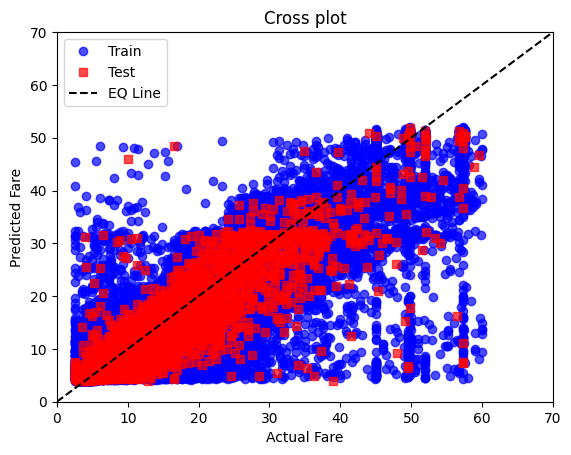

In [192]:
plt.figure()
plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.7,label='Train')
plt.plot(np.exp(y_test), np.exp(yhat_test), 'rs', alpha=0.7,label='Test')
plt.plot([0,100],[0,100],'k--',label='EQ Line')
plt.xlim((0, 70))
plt.ylim((0, 70))
plt.legend();
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Cross plot');